In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_valid.shape

(5000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [11]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

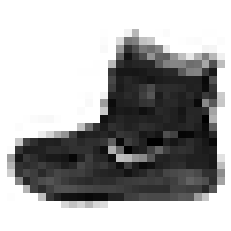

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
y_train[0]

9

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Ankle boot'

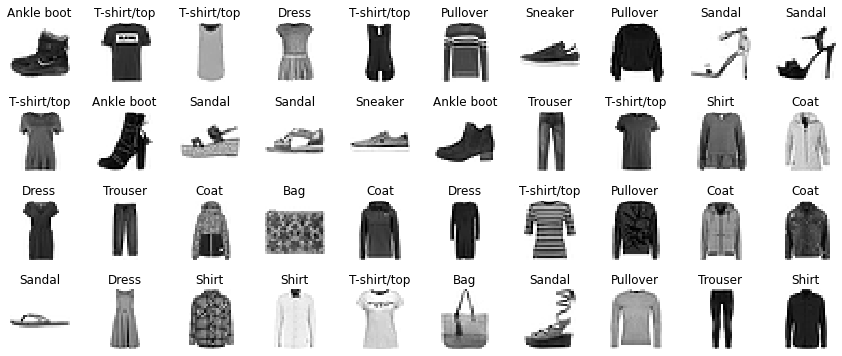

In [17]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


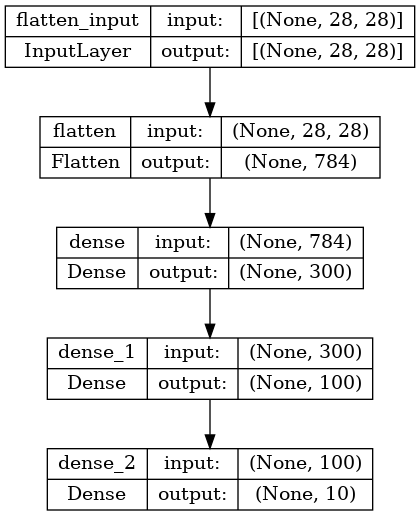

In [21]:
img_file = 'model_1_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [22]:
model.layers

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[ 0.06190495, -0.03623957,  0.0388086 , ...,  0.01794343,
        -0.04134275, -0.00801896],
       [ 0.03838824,  0.02918646,  0.02946692, ...,  0.02209298,
         0.02068587, -0.01738246],
       [ 0.0628808 , -0.04784809, -0.00586825, ...,  0.00959313,
         0.06666395,  0.0734375 ],
       ...,
       [-0.054879  , -0.03029599,  0.05754752, ..., -0.01875507,
         0.02874531, -0.04111448],
       [-0.04542287, -0.01103809,  0.02563849, ...,  0.03665967,
         0.0232951 , -0.05466861],
       [ 0.00561183, -0.03493639, -0.02807287, ...,  0.030047  ,
        -0.07307595, -0.03795335]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [33]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [36]:
weights2, biases2 = hidden2.get_weights()

In [37]:
weights2

array([[ 0.01221175,  0.04375403, -0.01665077, ...,  0.06768071,
        -0.05084606,  0.00248409],
       [-0.06125453, -0.08030567, -0.07351008, ..., -0.09142461,
         0.07144306, -0.04482028],
       [ 0.02040688,  0.03836108, -0.07457539, ..., -0.10024195,
        -0.02997642,  0.03649139],
       ...,
       [-0.11836923, -0.00269891,  0.0926911 , ...,  0.039156  ,
         0.03422087, -0.03720983],
       [-0.00584366,  0.07956152, -0.00724319, ...,  0.0830048 ,
        -0.05427577,  0.0713337 ],
       [ 0.04161342, -0.10469288,  0.10930908, ...,  0.11572141,
        -0.03935909,  0.07468437]], dtype=float32)

In [38]:
biases2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [39]:
hidden3 = model.layers[3]
hidden3.name

'dense_2'

In [40]:
weights3, biases3 = hidden3.get_weights()

In [41]:
weights3

array([[-7.93783069e-02, -1.78140447e-01, -8.52557719e-02,
         1.71430796e-01, -1.03249207e-01,  1.78285956e-01,
        -2.28740826e-01,  3.40840816e-02, -2.33192757e-01,
         3.25545371e-02],
       [-9.41535681e-02,  1.42661780e-01, -1.21085562e-01,
         2.22261101e-01, -1.42543569e-01, -1.98002160e-03,
        -9.51878726e-02,  1.78072304e-01,  6.78120852e-02,
        -6.12950027e-02],
       [-2.05507651e-01,  2.10996687e-01,  6.78643286e-02,
         1.97794735e-01, -1.53037339e-01, -1.26220882e-01,
         1.21070147e-02, -2.22799152e-01,  1.78643316e-01,
         1.61544085e-01],
       [ 1.73207760e-01,  1.83478802e-01, -1.73235759e-01,
        -1.39292777e-01,  2.00114965e-01,  2.90713310e-02,
         1.70113415e-01, -8.17782283e-02, -2.10105032e-01,
         5.29825389e-02],
       [ 1.93903476e-01, -1.14814259e-01,  1.41137540e-02,
         1.70059502e-03, -1.91408932e-01,  1.15719438e-01,
         3.92877460e-02, -3.40378731e-02,  2.11207896e-01,
        -2.

In [42]:
biases3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
# extra code - how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [45]:
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7183 - sparse_categorical_accuracy: 0.7628 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4903 - sparse_categorical_accuracy: 0.8304 - val_loss: 0.4665 - val_sparse_categorical_accuracy: 0.8288
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4426 - sparse_categorical_accuracy: 0.8445 - val_loss: 0.4228 - val_sparse_categorical_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4175 - sparse_categorical_accuracy: 0.8547 - val_loss: 0.3980 - val_sparse_categorical_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3964 - sparse_categorical_accuracy: 0.8615 - val_loss: 0.3938 - val_sparse_categorical_accuracy: 0.8592
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3801 - spars

In [46]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [47]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

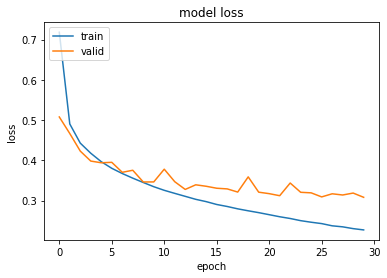

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8844


[0.3307848274707794, 0.8844000101089478]

In [53]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss:", results[0])
print("test acc:", results[1])

79/79 [==============================] - 0s 2ms/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8844
test loss: 0.33078473806381226
test acc: 0.8844000101089478


In [54]:
X_new = X_test[:5]
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 86ms/step


In [55]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [56]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [57]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

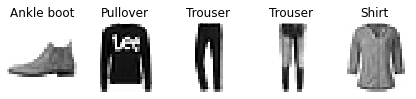

In [58]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [59]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [60]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [61]:
model.save_weights("my_weights")

In [62]:
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [63]:
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


In [ ]:
# Inference model

In [64]:
model = tf.keras.models.load_model("my_keras_model")

In [65]:
model.load_weights("my_weights")

In [72]:
y_proba = model.predict(X_test[-1])
y_pred = y_proba.argmax(axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 65ms/step


array(['Sandal'], dtype='<U11')